#Trabajo Práctico BIG DATA
Alumna: Daniela Echauri

El propósito de esta tarea práctica consiste en aplicar técnicas de web scraping para obtener comentarios de películas de un sitio web, realizar el procesamiento de texto y llevar a cabo el análisis de sentimiento de dichos comentarios utilizando técnicas de análisis de texto. Asimismo, se busca visualizar los resultados a través de gráficos con el fin de obtener una representación clara de los datos obtenidos.

Las dos películas de Avatar serán objeto de análisis en este estudio, utilizando como fuente de reseñas la plataforma https://www.imdb.com/. Mediante técnicas de web scraping, se recopilarán los comentarios correspondientes utilizando el lenguaje de programación Python. Para garantizar un rendimiento óptimo del notebook y con fines didácticos que faciliten el análisis, se ha decidido trabajar con 400 comentarios.


#AVATAR 1#

In [95]:
!pip install beautifulsoup4
!pip install pandas


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


En resumen, este código realiza web scraping en la página web de IMDb para recolectar comentarios de la pelicula AVATAR 1 Y AVATAR 2 y los guarda en un archivo CSV.

In [175]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

def extraer_comentarios(url):
    lista_comentarios = []

    # Realizar solicitudes GET a todas las páginas de comentarios disponibles
    page = 1
    comentarios_recolectados = 0
    comentarios_por_pagina = 25

    while comentarios_recolectados < 400:
        # Construir la URL de la página actual
        url_actual = f"{url}&start={((page-1)*comentarios_por_pagina)}"

        # Realizar la solicitud GET a la página web
        response = requests.get(url_actual)

        # Crear el objeto BeautifulSoup con el contenido HTML
        soup = BeautifulSoup(response.content, 'html.parser')

        # Encontrar todos los elementos que contienen los comentarios
        comentarios = soup.find_all('div', class_='review-container')

        # Salir del bucle si no hay más comentarios en la página
        if len(comentarios) == 0:
            break

        # Iterar sobre cada comentario y extraer el texto
        for comentario in comentarios:
            texto = comentario.find('div', class_='text show-more__control').text.strip()
            lista_comentarios.append(texto)
            comentarios_recolectados += 1

            if comentarios_recolectados >= 400:
                break

        # Incrementar la página para la siguiente solicitud
        page += 1

    return lista_comentarios

# URL del sitio web que contiene los comentarios de la película
url = 'https://www.imdb.com/title/tt0499549/reviews/?ref_=tt_ql_2'

# Extraer los comentarios de la página web
comentarios = extraer_comentarios(url)

# Crear un DataFrame con los comentarios
df1 = pd.DataFrame(comentarios, columns=['Comentario'])

# Guardar el DataFrame en un archivo CSV
df1.to_csv('comentarios_peliculas.csv', index=False)


In [176]:
df1

,Comentario
0,I'm not exactly sure when it became a thing am...
1,I was waiting for this day for the longest tim...
2,Nobody directs like James Cameron. Ten years i...
3,Hatts of to JAMES CAMERON for thinking and cre...
4,"Forgive me, I'm going to jump from professiona..."
...,...
395,It was Terminator in the 1980's and then Titan...
396,A { - M I C R O - } REVIEW .I just { R E }-wat...
397,I am sure my comment will be lost in a sea of ...
398,"The special effects are fascinating, but the c..."


Ver la cantidad de datos en el dataframe

In [177]:
df1.shape

(400, 1)

###Procesamiento de Texto###

In [178]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Este código realiza la limpieza de texto de los comentarios de la película que se encuentran en un archivo CSV, aplicando transformaciones como convertir a minúsculas, eliminar caracteres especiales, tokenizar en palabras y eliminar stop words. Luego muestra las primeras filas del DataFrame resultante que incluye los comentarios limpios.

In [179]:
import re
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')


# Función para limpiar el texto de los comentarios
def limpiar_texto(texto):
    # Convertir texto a minúsculas
    texto = texto.lower()

    # Eliminar caracteres especiales y signos de puntuación
    texto = re.sub(r'[^a-zA-Z0-9\s]', '', texto)

    # Tokenizar el texto en palabras
    tokens = word_tokenize(texto, language='english')

    # Eliminar palabras irrelevantes (stop words)
    stop_words = set(stopwords.words('english'))
    tokens_filtrados = [palabra for palabra in tokens if palabra not in stop_words]

    # Unir las palabras filtradas en un solo texto
    texto_filtrado = ' '.join(tokens_filtrados)

    return texto_filtrado

# Leer el archivo CSV con los comentarios
df1_limpio = pd.read_csv('comentarios_peliculas.csv')

# Aplicar la función de limpieza a la columna 'Comentario' y crear una nueva columna 'Comentario Limpio'
df1_limpio['Comentario Limpio'] = df1_limpio['Comentario'].apply(limpiar_texto)

# Mostrar el DataFrame con la nueva columna
print(df1_limpio.head())


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                                          Comentario  \
0  I'm not exactly sure when it became a thing am...   
1  I was waiting for this day for the longest tim...   
2  Nobody directs like James Cameron. Ten years i...   
3  Hatts of to JAMES CAMERON for thinking and cre...   
4  Forgive me, I'm going to jump from professiona...   

                                   Comentario Limpio  
0  im exactly sure became thing among tribe film ...  
1  waiting day longest time kid back 2009 movie r...  
2  nobody directs like james cameron ten years wo...  
3  hatts james cameron thinking creating vision l...  
4  forgive im going jump professional fan boy hav...  


In [180]:
df1_limpio

,Comentario,Comentario Limpio
0,I'm not exactly sure when it became a thing am...,im exactly sure became thing among tribe film ...
1,I was waiting for this day for the longest tim...,waiting day longest time kid back 2009 movie r...
2,Nobody directs like James Cameron. Ten years i...,nobody directs like james cameron ten years wo...
3,Hatts of to JAMES CAMERON for thinking and cre...,hatts james cameron thinking creating vision l...
4,"Forgive me, I'm going to jump from professiona...",forgive im going jump professional fan boy hav...
...,...,...
395,It was Terminator in the 1980's and then Titan...,terminator 1980s titanic 90s definitely avatar...
396,A { - M I C R O - } REVIEW .I just { R E }-wat...,c r review r e watched film dvd yes believe us...
397,I am sure my comment will be lost in a sea of ...,sure comment lost sea blue anyways goesjust at...
398,"The special effects are fascinating, but the c...",special effects fascinating characters plot tr...


eliminar la columna de comentario, y dejar la columna de comentario limpio

In [181]:


# Leer el archivo CSV con los comentarios
df1_limpio= pd.read_csv('comentarios_peliculas.csv')

# Aplicar la función de limpieza a la columna 'Comentario' y crear una nueva columna 'Comentario Limpio'
df1_limpio['Comentario Limpio'] = df1_limpio['Comentario'].apply(limpiar_texto)

# Eliminar la columna 'Comentario'
df1_limpio= df1_limpio.drop('Comentario', axis=1)

# Mostrar el DataFrame con la nueva columna
print(df1_limpio.head())


                                   Comentario Limpio
0  im exactly sure became thing among tribe film ...
1  waiting day longest time kid back 2009 movie r...
2  nobody directs like james cameron ten years wo...
3  hatts james cameron thinking creating vision l...
4  forgive im going jump professional fan boy hav...


In [182]:
df1_limpio

,Comentario Limpio
0,im exactly sure became thing among tribe film ...
1,waiting day longest time kid back 2009 movie r...
2,nobody directs like james cameron ten years wo...
3,hatts james cameron thinking creating vision l...
4,forgive im going jump professional fan boy hav...
...,...
395,terminator 1980s titanic 90s definitely avatar...
396,c r review r e watched film dvd yes believe us...
397,sure comment lost sea blue anyways goesjust at...
398,special effects fascinating characters plot tr...


###Analisis de Sentimientos##

Para realizar el análisis de sentimientos en los comentarios, se opta por utilizar la biblioteca NLTK, y TextBlob. Aquí el código que realiza el análisis de sentimientos y clasifica los comentarios en positivos, negativos o neutros según el puntaje de sentimiento:

####Con TextBlob####

In [183]:
from textblob import TextBlob

def analizar_sentimiento(texto):
    # Crear un objeto TextBlob con el texto del comentario
    blob = TextBlob(texto)

    # Obtener el puntaje de sentimiento del comentario
    puntaje_sentimiento = blob.sentiment.polarity


    # Asignar una clasificación según el puntaje de sentimiento
    if puntaje_sentimiento > 0:
        clasificacion = 'Positivo'
    elif puntaje_sentimiento < 0:
        clasificacion = 'Negativo'
    else:
        clasificacion = 'Neutro'

    return puntaje_sentimiento, clasificacion

# Aplicar el análisis de sentimiento a la columna 'Comentario Limpio'
df1_limpio['Puntaje de Sentimiento'], df1_limpio['Clasificación'] = zip(*df1_limpio['Comentario Limpio'].map(analizar_sentimiento))
print(df1_limpio.head())


                                   Comentario Limpio  Puntaje de Sentimiento  \
0  im exactly sure became thing among tribe film ...                0.104479   
1  waiting day longest time kid back 2009 movie r...                0.083333   
2  nobody directs like james cameron ten years wo...                0.138119   
3  hatts james cameron thinking creating vision l...                0.175567   
4  forgive im going jump professional fan boy hav...                0.209862   

  Clasificación  
0      Positivo  
1      Positivo  
2      Positivo  
3      Positivo  
4      Positivo  


In [184]:
df1_limpio

,Comentario Limpio,Puntaje de Sentimiento,Clasificación
0,im exactly sure became thing among tribe film ...,0.104479,Positivo
1,waiting day longest time kid back 2009 movie r...,0.083333,Positivo
2,nobody directs like james cameron ten years wo...,0.138119,Positivo
3,hatts james cameron thinking creating vision l...,0.175567,Positivo
4,forgive im going jump professional fan boy hav...,0.209862,Positivo
...,...,...,...
395,terminator 1980s titanic 90s definitely avatar...,0.356044,Positivo
396,c r review r e watched film dvd yes believe us...,0.114103,Positivo
397,sure comment lost sea blue anyways goesjust at...,0.461250,Positivo
398,special effects fascinating characters plot tr...,0.153839,Positivo


In [185]:
# Imprimir la cantidad de sentimientos positivos y negativos
conteo_sentimientos = df1_limpio['Clasificación'].value_counts()
print("Sentimientos positivos:", conteo_sentimientos['Positivo'])
print("Sentimientos negativos:", conteo_sentimientos['Negativo'])

Sentimientos positivos: 384
Sentimientos negativos: 16


###Visualizacion de los datos###

###Nubes de palabras

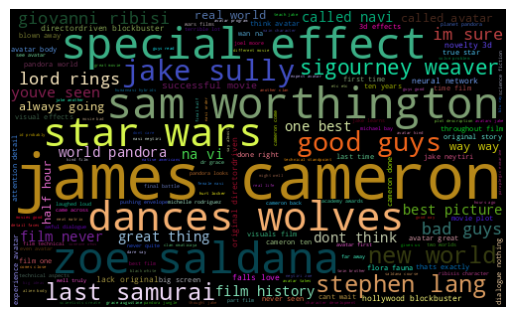

In [197]:
all_comments = ' '.join(df1_limpio['Comentario Limpio'])
stop_words = set(stopwords.words('english'))
tokens = word_tokenize(all_comments)
filtered_tokens = [word for word in tokens if word.lower() not in stop_words and len(word) > 1]
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110, color_func=random_color_func).generate(' '.join(filtered_tokens))
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

####Con TextBlob####

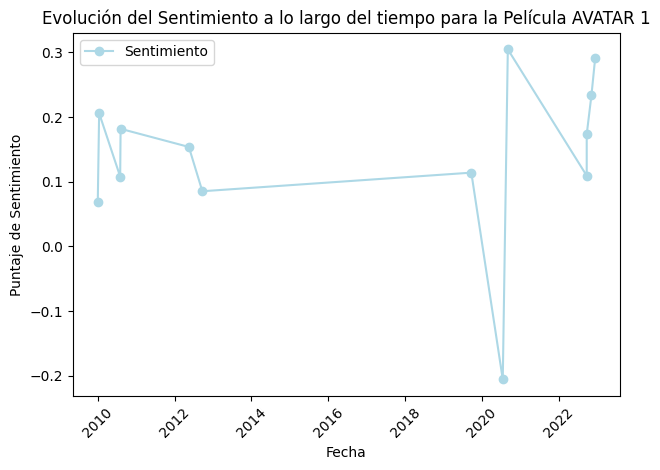

In [189]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob


# Crear listas para almacenar las fechas y los puntajes de sentimiento
fechas = []
puntajes_sentimiento = []

# Iterar sobre cada comentario y extraer la información de fecha y sentimiento
for comentario in comentarios:
    fecha_element = comentario.find('span', class_='review-date')
    puntaje_element = comentario.find('span', class_='rating-other-user-rating')

    # Verificar si los elementos existen antes de acceder a sus atributos
    if fecha_element and puntaje_element:
        fecha = fecha_element.text.strip()
        puntaje = puntaje_element.text.strip()

        # Aplicar el análisis de sentimiento al comentario limpio
        comentario_limpio = limpiar_texto(comentario.text)
        puntaje_sentimiento, clasificacion = analizar_sentimiento(comentario_limpio)

        # Agregar las fechas, los puntajes y las clasificaciones a las listas correspondientes
        fechas.append(fecha)
        puntajes_sentimiento.append(puntaje_sentimiento)

# Crear DataFrame con los datos
df = pd.DataFrame({'Fecha': fechas, 'Puntaje de Sentimiento': puntajes_sentimiento})

# Convertir la columna de fechas al tipo datetime
df['Fecha'] = pd.to_datetime(df['Fecha'])

# Filtrar los datos a partir del año 2017
df = df[df['Fecha'].dt.year >= 2010]

# Ordenar los datos por fecha
df = df.sort_values('Fecha')

# Crear el gráfico de líneas
plt.plot(df['Fecha'], df['Puntaje de Sentimiento'], marker='o', linestyle='-', color='lightblue', label='Sentimiento')

# Agregar etiquetas y título al gráfico
plt.xlabel('Fecha')
plt.ylabel('Puntaje de Sentimiento')
plt.title('Evolución del Sentimiento a lo largo del tiempo para la Película AVATAR 1')

# Agregar leyenda
plt.legend()

# Rotar las etiquetas del eje x para una mejor visualización
plt.xticks(rotation=45)

# Ajustar los márgenes del gráfico
plt.tight_layout()

# Mostrar el gráfico
plt.show()




El gráfico de líneas muestra la evolución del sentimiento a lo largo del tiempo para los comentarios analizados. El eje x representa las fechas de los comentarios, mientras que el eje y representa los puntajes de sentimiento. Cada punto en el gráfico indica el puntaje de sentimiento para un comentario específico en una fecha determinada. Al unir los puntos con líneas, se puede observar la tendencia general del sentimiento a medida que cambia a lo largo del tiempo.

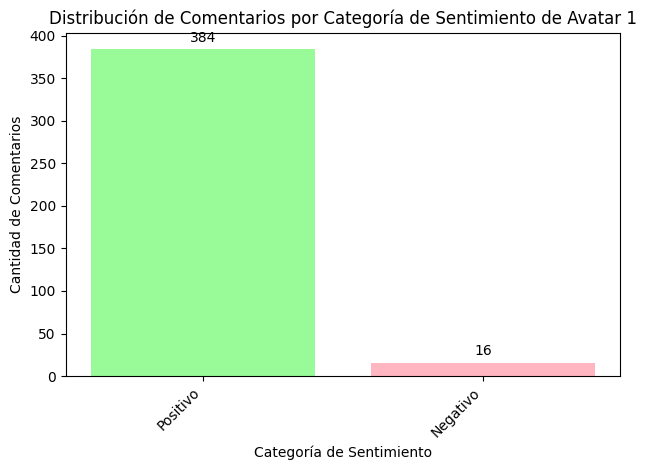

In [190]:
import pandas as pd
import matplotlib.pyplot as plt

# Calcular la cantidad de comentarios por categoría de sentimiento
conteo_sentimientos = df1_limpio['Clasificación'].value_counts()

# Definir colores pasteles para el gráfico de barras
colores = ['#98FB98', '#FFB6C1', '#87CEFA']

# Crear un gráfico de barras para mostrar la distribución de los comentarios
fig, ax = plt.subplots()
rects = ax.bar(conteo_sentimientos.index, conteo_sentimientos.values, color=colores)

# Agregar etiquetas y título al gráfico
ax.set_xlabel('Categoría de Sentimiento')
ax.set_ylabel('Cantidad de Comentarios')
ax.set_title('Distribución de Comentarios por Categoría de Sentimiento de Avatar 1')

# Mostrar la cantidad de comentarios en cada columna
for rect in rects:
    height = rect.get_height()
    ax.annotate('{}'.format(height),
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center',
                va='bottom')

# Ajustar el espaciado entre las etiquetas en el eje x
plt.xticks(rotation=45, ha='right')

# Ajustar el espaciado entre los elementos del gráfico
plt.tight_layout()

# Mostrar el gráfico
plt.show()


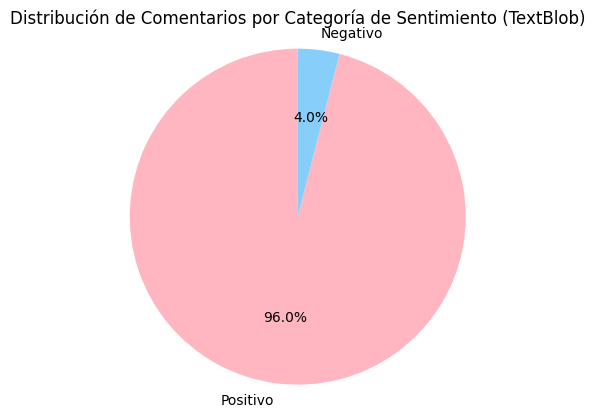

In [191]:
import pandas as pd
import matplotlib.pyplot as plt

# Calcular la cantidad de comentarios por categoría de sentimiento
conteo_sentimientos = df1_limpio['Clasificación'].value_counts()

# Definir colores pasteles para el gráfico de pastel
colores = ['#FFB6C1', '#87CEFA', '#98FB98']

# Crear un gráfico de pastel para mostrar la distribución de los comentarios
fig, ax = plt.subplots()
ax.pie(conteo_sentimientos.values, labels=conteo_sentimientos.index, autopct='%1.1f%%', colors=colores, startangle=90)

# Agregar título al gráfico
ax.set_title('Distribución de Comentarios por Categoría de Sentimiento (TextBlob)')

# Ajustar la relación de aspecto para que el gráfico de pastel se vea como un círculo
ax.axis('equal')

# Mostrar el gráfico
plt.show()


#### Con Vader

In [192]:
import nltk


In [193]:
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

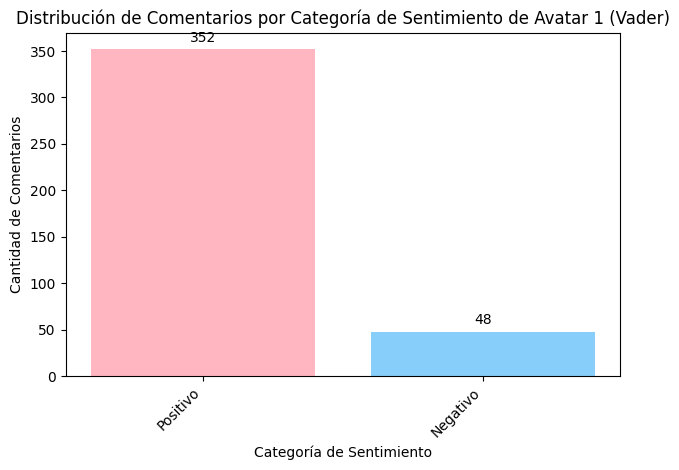

In [194]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Crear un objeto SentimentIntensityAnalyzer de NLTK
sia = SentimentIntensityAnalyzer()

# Aplicar el análisis de sentimiento a cada comentario limpio del DataFrame
df1_limpio['Puntaje de Sentimiento'] = df1_limpio['Comentario Limpio'].apply(lambda x: sia.polarity_scores(x)['compound'])
df1_limpio['Clasificación'] = df1_limpio['Puntaje de Sentimiento'].apply(lambda x: 'Positivo' if x > 0 else ('Negativo' if x < 0 else 'Neutro'))

# Calcular la cantidad de comentarios por categoría de sentimiento
conteo_sentimientos = df1_limpio['Clasificación'].value_counts()

# Definir colores pasteles para el gráfico de barras
colores = ['#FFB6C1', '#87CEFA', '#98FB98']

# Crear un gráfico de barras para mostrar la distribución de los comentarios
fig, ax = plt.subplots()
rects = ax.bar(conteo_sentimientos.index, conteo_sentimientos.values, color=colores)

# Agregar etiquetas y título al gráfico
ax.set_xlabel('Categoría de Sentimiento')
ax.set_ylabel('Cantidad de Comentarios')
ax.set_title('Distribución de Comentarios por Categoría de Sentimiento de Avatar 1 (Vader)')

# Mostrar la cantidad de comentarios en cada columna
for rect in rects:
    height = rect.get_height()
    ax.annotate('{}'.format(height),
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center',
                va='bottom')

# Ajustar el espaciado entre las etiquetas en el eje x
plt.xticks(rotation=45, ha='right')

# Ajustar el espaciado entre los elementos del gráfico
plt.tight_layout()

# Mostrar el gráfico
plt.show()


#AVATAR 2#

In [139]:
!pip install beautifulsoup4
!pip install pandas



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [152]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

def extraer_comentarios(url):
    lista_comentarios = []

    # Realizar solicitudes GET a todas las páginas de comentarios disponibles
    page = 1
    comentarios_recolectados = 0
    comentarios_por_pagina = 25

    while comentarios_recolectados < 400:
        # Construir la URL de la página actual
        url_actual = f"{url}&start={((page-1)*comentarios_por_pagina)}"

        # Realizar la solicitud GET a la página web
        response = requests.get(url_actual)

        # Crear el objeto BeautifulSoup con el contenido HTML
        soup = BeautifulSoup(response.content, 'html.parser')

        # Encontrar todos los elementos que contienen los comentarios
        comentarios = soup.find_all('div', class_='review-container')

        # Salir del bucle si no hay más comentarios en la página
        if len(comentarios) == 0:
            break

        # Iterar sobre cada comentario y extraer el texto
        for comentario in comentarios:
            texto = comentario.find('div', class_='text show-more__control').text.strip()
            lista_comentarios.append(texto)
            comentarios_recolectados += 1

            if comentarios_recolectados >= 400:
                break

        # Incrementar la página para la siguiente solicitud
        page += 1

    return lista_comentarios

# URL del sitio web que contiene los comentarios de la película
url = 'https://www.imdb.com/title/tt1630029/reviews?ref_=tt_urv'

# Extraer los comentarios de la página web
comentarios = extraer_comentarios(url)

# Crear un DataFrame con los comentarios
df2 = pd.DataFrame(comentarios, columns=['Comentario'])

# Guardar el DataFrame en un archivo CSV
df2.to_csv('comentarios_peliculas.csv', index=False)

In [153]:
df2

,Comentario
0,I struggled to get through this film. It was j...
1,"Pros:\n1. For the most part, the movie has exc..."
2,"Technically gorgeous, but the story is similar..."
3,The strong suit of the first Avatar movie was ...
4,"Visually spectacular, but my goodness, does it..."
...,...
395,It's hard to believe the sequel to Avatar has ...
396,The visual effects were great on the actual Na...
397,I really wish I could appreciate it for what i...
398,He did it again. And I don't even really under...


###Procesamiento de Texto###

Para realizar el procesamiento de texto en los comentarios extraídos, se necesita utilizar algunas bibliotecas adicionales en Python, como nltk (Natural Language Toolkit) y spacy. Estas bibliotecas proporcionan funciones y modelos de lenguaje para realizar tareas como limpieza de texto, tokenización, lematización y eliminación de palabras vacías.

A continuación, se realizará el procesamiento de texto en los comentarios utilizando las bibliotecas mencionadas:

En la función extraer_comentarios, se ha ajustado el selector de elementos para encontrar los comentarios. En IMDb, los comentarios están contenidos en elementos con la clase review-container. Por lo tanto, se ha cambiado la línea comentarios = soup.find_all('div', class_='comentario') a comentarios = soup.find_all('div', class_='review-container').

Para extraer el texto del comentario, se ha ajustado el selector de elementos en el bucle for. En IMDb, el texto del comentario está contenido en elementos <div> con la clase text show-more__control.

In [155]:
import re
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Función para limpiar el texto de los comentarios
def limpiar_texto(texto):
    # Convertir texto a minúsculas
    texto = texto.lower()

    # Eliminar caracteres especiales y signos de puntuación
    texto = re.sub(r'[^a-zA-Z0-9\s]', '', texto)

    # Tokenizar el texto en palabras
    tokens = word_tokenize(texto, language='english')

    # Eliminar palabras irrelevantes (stop words)
    stop_words = set(stopwords.words('english'))
    tokens_filtrados = [palabra for palabra in tokens if palabra not in stop_words]

    # Unir las palabras filtradas en un solo texto
    texto_filtrado = ' '.join(tokens_filtrados)

    return texto_filtrado

# Leer el archivo CSV con los comentarios
df2_limpio= pd.read_csv('comentarios_peliculas.csv')

# Aplicar la función de limpieza a la columna 'Comentario' y crear una nueva columna 'Comentario Limpio'
df2_limpio['Comentario Limpio'] = df2_limpio['Comentario'].apply(limpiar_texto)

# Mostrar el DataFrame con la nueva columna
print(df2_limpio.head())


                                          Comentario  \
0  I struggled to get through this film. It was j...   
1  Pros:\n1. For the most part, the movie has exc...   
2  Technically gorgeous, but the story is similar...   
3  The strong suit of the first Avatar movie was ...   
4  Visually spectacular, but my goodness, does it...   

                                   Comentario Limpio  
0  struggled get film rehash first film tired mag...  
1  pros 1 part movie exceptional visuals produces...  
2  technically gorgeous story similarly emotional...  
3  strong suit first avatar movie sure story rete...  
4  visually spectacular goodness dragits 1hr 50 m...  


In [156]:
df2_limpio

,Comentario,Comentario Limpio
0,I struggled to get through this film. It was j...,struggled get film rehash first film tired mag...
1,"Pros:\n1. For the most part, the movie has exc...",pros 1 part movie exceptional visuals produces...
2,"Technically gorgeous, but the story is similar...",technically gorgeous story similarly emotional...
3,The strong suit of the first Avatar movie was ...,strong suit first avatar movie sure story rete...
4,"Visually spectacular, but my goodness, does it...",visually spectacular goodness dragits 1hr 50 m...
...,...,...
395,It's hard to believe the sequel to Avatar has ...,hard believe sequel avatar actually come 13 ye...
396,The visual effects were great on the actual Na...,visual effects great actual navi people everyt...
397,I really wish I could appreciate it for what i...,really wish could appreciate demonstration cut...
398,He did it again. And I don't even really under...,dont even really understand kind mysterious sp...


eliminar la columna de comentario, y dejar la columna de comentario limpio

In [157]:
import re
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Leer el archivo CSV con los comentarios
df2_limpio = pd.read_csv('comentarios_peliculas.csv')

# Aplicar la función de limpieza a la columna 'Comentario' y crear una nueva columna 'Comentario Limpio'
df2_limpio['Comentario Limpio'] = df2_limpio['Comentario'].apply(limpiar_texto)

# Eliminar la columna 'Comentario'
df2_limpio= df2_limpio.drop('Comentario', axis=1)

# Mostrar el DataFrame con la nueva columna
print(df2_limpio.head())


                                   Comentario Limpio
0  struggled get film rehash first film tired mag...
1  pros 1 part movie exceptional visuals produces...
2  technically gorgeous story similarly emotional...
3  strong suit first avatar movie sure story rete...
4  visually spectacular goodness dragits 1hr 50 m...


In [158]:
df2_limpio

,Comentario Limpio
0,struggled get film rehash first film tired mag...
1,pros 1 part movie exceptional visuals produces...
2,technically gorgeous story similarly emotional...
3,strong suit first avatar movie sure story rete...
4,visually spectacular goodness dragits 1hr 50 m...
...,...
395,hard believe sequel avatar actually come 13 ye...
396,visual effects great actual navi people everyt...
397,really wish could appreciate demonstration cut...
398,dont even really understand kind mysterious sp...


En este código, se ha agregado la función limpiar_texto que utiliza expresiones regulares para eliminar caracteres especiales y signos de puntuación. Además, se utiliza la biblioteca nltk para tokenizar el texto en palabras y eliminar las palabras irrelevantes (stop words) en inglés.

Hay que tener en cuenta que el código se ha adaptado para trabajar con comentarios en inglés, ya que el sitio web IMDb está en ese idioma

In [159]:
df2_limpio.to_csv

<bound method NDFrame.to_csv of                                      Comentario Limpio
0    struggled get film rehash first film tired mag...
1    pros 1 part movie exceptional visuals produces...
2    technically gorgeous story similarly emotional...
3    strong suit first avatar movie sure story rete...
4    visually spectacular goodness dragits 1hr 50 m...
..                                                 ...
395  hard believe sequel avatar actually come 13 ye...
396  visual effects great actual navi people everyt...
397  really wish could appreciate demonstration cut...
398  dont even really understand kind mysterious sp...
399  bad bad avatar 2 bore fest pretty outside holl...

[400 rows x 1 columns]>

###Analisis de Sentimientos###

Para realizar el análisis de sentimientos en los comentarios y clasificarlos en positivos, negativos o neutros según el puntaje de sentimiento, se puede utilizar la biblioteca NLTK. A continuación se muestra el código que implementa esta funcionalidad:

####Con TextBlob####

In [162]:
from textblob import TextBlob

def analizar_sentimiento(texto):
    # Crear un objeto TextBlob con el texto del comentario
    blob = TextBlob(texto)

    # Obtener el puntaje de sentimiento del comentario
    puntaje_sentimiento = blob.sentiment.polarity


    # Asignar una clasificación según el puntaje de sentimiento
    if puntaje_sentimiento > 0:
        clasificacion = 'Positivo'
    elif puntaje_sentimiento < 0:
        clasificacion = 'Negativo'
    else:
        clasificacion = 'Neutro'

    return puntaje_sentimiento, clasificacion

# Aplicar el análisis de sentimiento a la columna 'Comentario Limpio'
df2_limpio['Puntaje de Sentimiento'], df2_limpio['Clasificación'] = zip(*df2_limpio['Comentario Limpio'].map(analizar_sentimiento))

# Mostrar el DataFrame con los resultados del análisis de sentimiento
print(df2_limpio.head())


                                   Comentario Limpio  Puntaje de Sentimiento  \
0  struggled get film rehash first film tired mag...                0.065556   
1  pros 1 part movie exceptional visuals produces...                0.061749   
2  technically gorgeous story similarly emotional...                0.069318   
3  strong suit first avatar movie sure story rete...                0.183455   
4  visually spectacular goodness dragits 1hr 50 m...               -0.227885   

  Clasificación  
0      Positivo  
1      Positivo  
2      Positivo  
3      Positivo  
4      Negativo  


In [163]:
df2_limpio

,Comentario Limpio,Puntaje de Sentimiento,Clasificación
0,struggled get film rehash first film tired mag...,0.065556,Positivo
1,pros 1 part movie exceptional visuals produces...,0.061749,Positivo
2,technically gorgeous story similarly emotional...,0.069318,Positivo
3,strong suit first avatar movie sure story rete...,0.183455,Positivo
4,visually spectacular goodness dragits 1hr 50 m...,-0.227885,Negativo
...,...,...,...
395,hard believe sequel avatar actually come 13 ye...,0.119159,Positivo
396,visual effects great actual navi people everyt...,0.207143,Positivo
397,really wish could appreciate demonstration cut...,-0.050758,Negativo
398,dont even really understand kind mysterious sp...,0.205807,Positivo


In [164]:
# Imprimir la cantidad de sentimientos positivos y negativos
conteo_sentimientos = df2_limpio['Clasificación'].value_counts()
print("Sentimientos positivos:", conteo_sentimientos['Positivo'])
print("Sentimientos negativos:", conteo_sentimientos['Negativo'])

Sentimientos positivos: 272
Sentimientos negativos: 128


####Visualización de los datos####

###Nubes de palabras





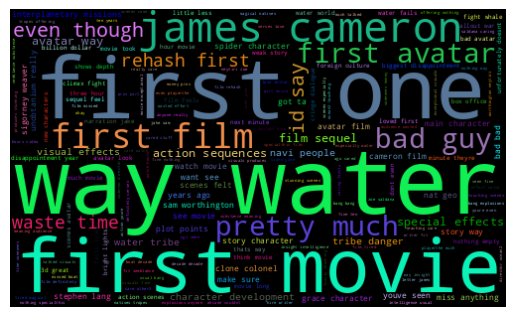

In [196]:
all_comments = ' '.join(df2_limpio['Comentario Limpio'])
stop_words = set(stopwords.words('english'))
tokens = word_tokenize(all_comments)
filtered_tokens = [word for word in tokens if word.lower() not in stop_words and len(word) > 1]
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110, color_func=random_color_func).generate(' '.join(filtered_tokens))
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()



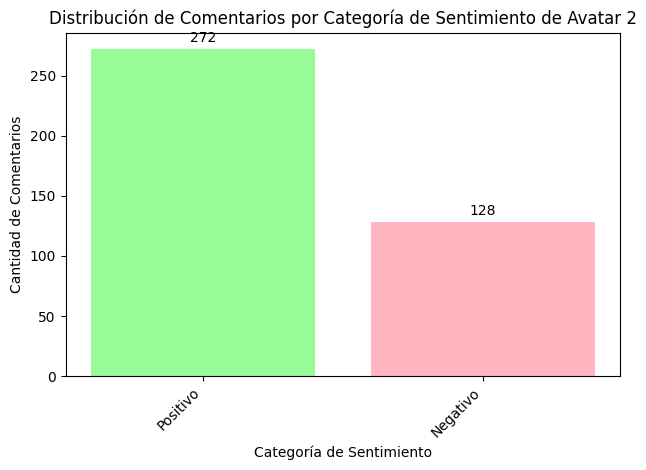

In [167]:
import pandas as pd
import matplotlib.pyplot as plt

# Calcular la cantidad de comentarios por categoría de sentimiento
conteo_sentimientos = df2_limpio['Clasificación'].value_counts()

# Definir colores pasteles para el gráfico de barras
colores = ['#98FB98', '#FFB6C1', '#87CEFA']

# Crear un gráfico de barras para mostrar la distribución de los comentarios
fig, ax = plt.subplots()
rects = ax.bar(conteo_sentimientos.index, conteo_sentimientos.values, color=colores)

# Agregar etiquetas y título al gráfico
ax.set_xlabel('Categoría de Sentimiento')
ax.set_ylabel('Cantidad de Comentarios')
ax.set_title('Distribución de Comentarios por Categoría de Sentimiento de Avatar 2')

# Mostrar la cantidad de comentarios en cada columna
for rect in rects:
    height = rect.get_height()
    ax.annotate('{}'.format(height),
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center',
                va='bottom')

# Ajustar el espaciado entre las etiquetas en el eje x
plt.xticks(rotation=45, ha='right')

# Ajustar el espaciado entre los elementos del gráfico
plt.tight_layout()

# Mostrar el gráfico
plt.show()




En porcentaje

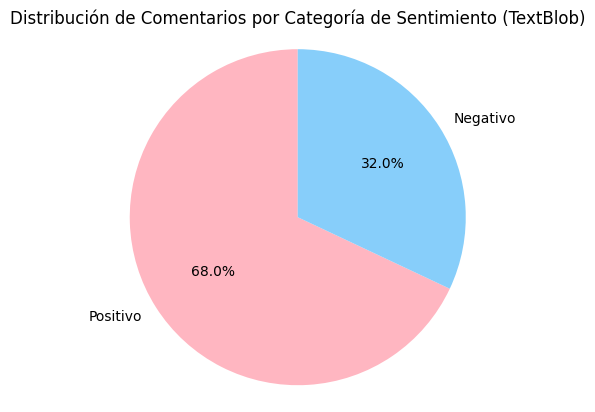

In [168]:
import pandas as pd
import matplotlib.pyplot as plt

# Calcular la cantidad de comentarios por categoría de sentimiento
conteo_sentimientos = df2_limpio['Clasificación'].value_counts()

# Definir colores pasteles para el gráfico de pastel
colores = ['#FFB6C1', '#87CEFA', '#98FB98']

# Crear un gráfico de pastel para mostrar la distribución de los comentarios
fig, ax = plt.subplots()
ax.pie(conteo_sentimientos.values, labels=conteo_sentimientos.index, autopct='%1.1f%%', colors=colores, startangle=90)

# Agregar título al gráfico
ax.set_title('Distribución de Comentarios por Categoría de Sentimiento (TextBlob)')

# Ajustar la relación de aspecto para que el gráfico de pastel se vea como un círculo
ax.axis('equal')

# Mostrar el gráfico
plt.show()

####Con NLTK####

In [169]:
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [170]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob

# Función para realizar el análisis de sentimiento con NLTK
def analizar_sentimiento_nltk(texto):
    # Crear un objeto SentimentIntensityAnalyzer
    sia = SentimentIntensityAnalyzer()

    # Obtener el puntaje de sentimiento del comentario
    puntaje_sentimiento = sia.polarity_scores(texto)['compound']

    # Asignar una clasificación según el puntaje de sentimiento
    if puntaje_sentimiento > 0:
        clasificacion = 'Positivo'
    elif puntaje_sentimiento < 0:
        clasificacion = 'Negativo'
    else:
        clasificacion = 'Neutro'

    return puntaje_sentimiento, clasificacion

In [171]:
# Aplicar el análisis de sentimiento utilizando NLTK
df['Puntaje de Sentimiento NLTK'], df['Clasificación NLTK'] = zip(*df['Comentario'].map(analizar_sentimiento_nltk))


In [172]:
# Mostrar el DataFrame con los resultados del análisis de sentimiento
print(df.head())

                                          Comentario  \
0  I struggled to get through this film. It was j...   
1  Pros:\n1. For the most part, the movie has exc...   
2  Technically gorgeous, but the story is similar...   
3  The strong suit of the first Avatar movie was ...   
4  Visually spectacular, but my goodness, does it...   

                                   Comentario Limpio  \
0  struggled get film rehash first film tired mag...   
1  pros 1 part movie exceptional visuals produces...   
2  technically gorgeous story similarly emotional...   
3  strong suit first avatar movie sure story rete...   
4  visually spectacular goodness dragits 1hr 50 m...   

   Puntaje de Sentimiento NLTK Clasificación NLTK  
0                       0.9363           Positivo  
1                      -0.8423           Negativo  
2                      -0.9840           Negativo  
3                       0.9668           Positivo  
4                      -0.8955           Negativo  


####Visualizacion de los datos####

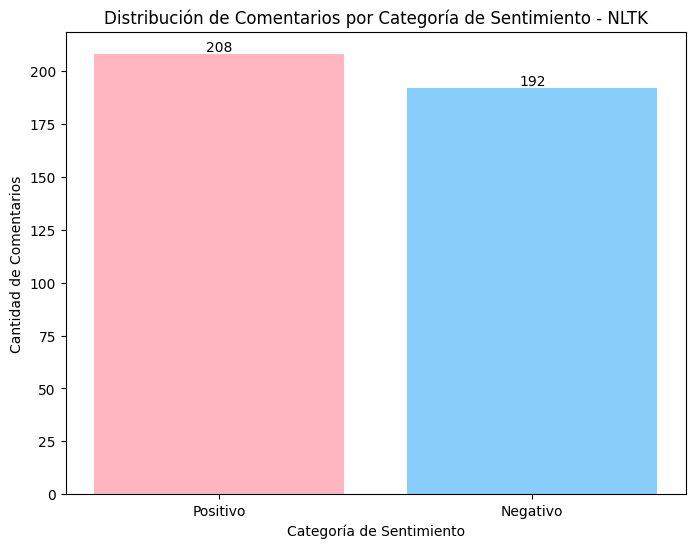

In [174]:
import matplotlib.pyplot as plt

# Obtener la distribución de los comentarios por categoría de sentimiento
distribucion_sentimiento = df['Clasificación NLTK'].value_counts()

# Crear un gráfico de barras para mostrar la distribución
plt.figure(figsize=(8, 6))
colors = ['#FFB6C1', '#87CEFA', '#98FB98']  # Colores pasteles para las barras
plt.bar(distribucion_sentimiento.index, distribucion_sentimiento.values, color=colors)

# Agregar las cantidades de comentarios en las columnas
for i, value in enumerate(distribucion_sentimiento.values):
    plt.text(i, value, str(value), ha='center', va='bottom')

plt.xlabel('Categoría de Sentimiento')
plt.ylabel('Cantidad de Comentarios')
plt.title('Distribución de Comentarios por Categoría de Sentimiento - NLTK')

plt.show()


La diferencia en los resultados entre NLTK y TextBlob se debe a las diferentes técnicas y enfoques utilizados por cada librería para el análisis de sentimientos.

NLTK (Natural Language Toolkit) es una biblioteca de procesamiento de lenguaje natural que ofrece una amplia gama de herramientas y algoritmos para tareas de procesamiento de texto. NLTK utiliza el analizador VADER (Valence Aware Dictionary and sEntiment Reasoner) para el análisis de sentimientos. VADER es un analizador de sentimientos específicamente diseñado para el procesamiento de texto en redes sociales y utiliza un conjunto de reglas heurísticas y un léxico con puntuaciones de polaridad para determinar la polaridad de un texto.

TextBlob, por otro lado, es una biblioteca de procesamiento de texto construida sobre NLTK y ofrece una interfaz más simple y de alto nivel. TextBlob utiliza un enfoque basado en reglas y un léxico predefinido para asignar puntuaciones de polaridad a las palabras y determinar la polaridad del texto en general.

Las diferencias en los resultados pueden deberse a varias razones:

1. Lexicon y enfoque: NLTK y TextBlob utilizan diferentes léxicos y enfoques para asignar puntuaciones de polaridad a las palabras. Esto puede llevar a variaciones en la polaridad asignada a palabras específicas y, por lo tanto, a diferentes resultados en la polaridad del texto en general.

2. Reglas y heurísticas: NLTK y VADER utilizan un conjunto de reglas y heurísticas específicas para el análisis de sentimientos en texto. Estas reglas pueden tener en cuenta aspectos particulares del texto, como el uso de emoticones, el contexto social y las convenciones lingüísticas en las redes sociales. Estas diferencias en las reglas pueden llevar a resultados diferentes en la clasificación de sentimientos.

3. Entrenamiento y generalización: NLTK y VADER están entrenados en conjuntos de datos específicos para analizar sentimientos en redes sociales. Esto puede hacer que sean más efectivos en el análisis de sentimientos en textos similares, como comentarios de redes sociales. TextBlob, al ser una biblioteca de nivel superior, puede ser más generalizado y no estar tan especializado en un dominio específico.

En resumen, las diferencias en los resultados entre NLTK y TextBlob se deben a las diferentes técnicas, enfoques y recursos lingüísticos utilizados por cada biblioteca. Es importante tener en cuenta estas diferencias al elegir una biblioteca para realizar análisis de sentimientos y considerar qué enfoque se adapta mejor a tus necesidades y al dominio específico de tus datos.

#CONCLUSIONES

Para el análisis de sentimientos, se utilizó la biblioteca NLTK para realizar esta tarea. Al analizar las críticas de películas, y clasificarlas como positivas, negativas o neutras en función de su puntuación de sentimiento. Esto para comprender cómo percibirá la película el público y qué reacciones emocionales se producirán. El web scraping, por su parte, se utiliza para recopilar críticas de películas de sitios web. Este proceso implica el uso de las bibliotecas Requests y BeautifulSoup para construir peticiones HTTP y recuperar información específica del HTML. Esto permite recoger opiniones a escala y utilizarlas para el análisis de sentimientos.

Al analizar la película Avatar 1, se observa que la mayoría de los comentarios fueron positivos, representando aproximadamente el 96% del total de comentarios analizados utilizando la biblioteca TextBlob. Por otro lado, los comentarios negativos representaron tan solo un 4% del total. Al analizar los comentarios de la película Avatar 2, se evidencia un aumento en la proporción de comentarios negativos, así como un incremento en la cantidad total de comentarios registrados en la página.

Se destaca una diferencia significativa en el análisis de sentimientos entre las bibliotecas NLTK, TextBlob y Vader para Avatar 2. Mientras que con el análisis de Vader los comentarios negativos casi igualan en cantidad a los comentarios positivos, se percibe que TextBlob, al ser una biblioteca de nivel superior, puede generalizar más y no estar tan especializada en un dominio específico, como fue el caso de las reseñas de Avatar 2.

Al realizar el análisis de la nube de palabras, se observa que las palabras más prominentes difieren en comparación con Avatar 1. En el caso de Avatar 2, la palabra "WATER" destaca debido a las numerosas referencias al agua en la película. Esto evidencia la influencia de la temática de la película en los usuarios y demuestra su compromiso al mencionarla en sus reseñas.

En cuanto a la visualización de los sentimientos a lo largo de los años desde el estreno de Avatar 1 en 2009, se puede apreciar una fluctuación en los sentimientos de los espectadores. Es especialmente notable cómo los sentimientos experimentaron una disminución en el año 2020 y luego experimentaron un aumento significativo. Además, se observa un incremento en los sentimientos conforme se acercaba el año de lanzamiento de Avatar 2.

En conclusión, Avatar 1 supera a Avatar 2 en términos de sentimientos positivos, y se pudo analizar la evolución de los sentimientos de los espectadores a lo largo de los años desde su lanzamiento. Asimismo, se pudo evaluar el impacto del lanzamiento de Avatar 2 en el aumento de los sentimientos.